In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform


 - https://darkpgmr.tistory.com/171
 - https://docs.opencv.org/4.4.0/de/dbc/tutorial_py_fourier_transform.html

    푸리에 변환은 기본적으로 주파수를 분석하는데 사용되는 방법이다. 주파수는 시간의 흐름에 따라 진동하는 파동의 횟수로, 이 파동은 sin, cos의 삼각함수로 표현할 수 있는데, 여기서 시간 축을 제거하고 파동의 전체적인 모습을 한 눈에 볼 수 있게 된다. 즉, 무한대의 시간축이 제거되고 주파수 도메인에서 분석이 가능해진다.
    
    이미지의 경우 2D 이산 푸리에 변환(Discrete Fourier Transform, DFT)를 사용해서 주파수 도메인을 찾는다. 이때 DFT를 계산하기 위해서 Fast Fourier Transform(FFT) 알고리즘이 사용된다. (자세한 내용은 이미지 처리 또는 신호 처리 분야에서 확인해볼 수 있다.)
    
    사인파 신호, x(t) = Asin(2πft)에서 우리는 f를 주파수라고 한다. 그리고 푸리에 변환을 통해 주파수 도메인을 취하면 우리는 f부분에서 값이 튀어오르는 것을 확인할 수 있다. 즉, 신호 샘플링을 통해 우리는 주파수 도메인에서 이산 신호를 형성할 수 있다. 이 신호는 (-π, π), (0, 2π)에서 주기적이며 이산 푸리에 변환의 경우 (0, N) 범위에서 주기적이다. 특히 이미지는 x, y축 두 방향으로 샘플링 되어야 하므로 이 두 축에서 푸리에 변환을 수행하면 이미지의 주파수를 표현할 수 있다. 실수 값으로 이루어진 이미지를 x와 y축에 따라 DFT 변환을 하게 되면 우리는 실수와 허수를 갖는 복소수 행렬을 얻게 된다. ★이 복소수 값의 크기를 통해 주파수 성분의 진폭을 얻을 수 있다. 즉 푸리에 변환 후 실수와 허수로 이루어진 복소수 값의 크기로 스펙트럼의 분포가 어떻게 되는지 확인할 수 있다.
    
    DFS를 통해 이미지 주파수를 얻는 경우, 다음과 같이 직관적으로 생각해볼 수 있다. 진폭이 단시간에 너무 빠르게 변화면 고주파 신호, 느리게 변화면 저주파 신호이다. 이를 이미지로 확장시켜 생각해본다면 이미지의 고주파 신호는 진폭이 크게 달라지는 곳이므로 가장자리 지점, 또는 노이즈에서 발생하고, 진폭의 변화가 크지 않아 이미지의 저주파 신호가 발생하는 곳은 주로 배경의 영역이 될 수 있다. 이는 [OpenCV Practice 10 - 1] 이미지 필터링에서 간단하게 다룬 내용과 동일하다.

-----

## Numpy로 푸리에 변환
    numpy에는 Fast Fourier Transform, FFT 알고리즘을 위한 fft 패키지가 존재한다. np.fft.fft2()는 주파수 변환 된 복소수 행렬을 반환한다. 첫번째 인자는 grayscale 입력 이미지를 받고, 두번째 인자로는 출력 배열의 크기를 결정하는 파라미터 값으로 선택적으로 입력할 수 있다. 만약 출력 배열의 크기가 입력 이미지의 크기보다 크면 FFT 계산 전에 입력 이미지가 0으로 채워지고, 그 반대로 입력 이미지의 크기보다 작으면 입력이미지가 잘리게 된다. 인수가 전달되지 않으면 default로 입력 이미지의 크기와 동일한 크기로 출력 배열의 크기가 정해진다.
    
    fft2 함수로 이미지에 푸리에 변환을 적용한 결과 "주파수가 0인 요소를 좌상단에" 위치시킨다. 이 요소를 정중앙으로 가져오면 주파수 분석을 더 쉽게 할 수 있게 된다. 그러기 위해선 결과적으로 x, y 축 양방향으로 N/2만큼 이동해야 하는데, 이는 fftshift() 함수에 의해서 간단하게 수행된다. 일단 fft2함수로 주파수 변환을 찾으면 우리는 np.abs 함수를 이용해 스펙트럼의 크기(magnitude spectrum)를 찾을 수 있다. (np.abs의 입력값이 복소수 일때, 복소수 값의 크기를 구해준다.)

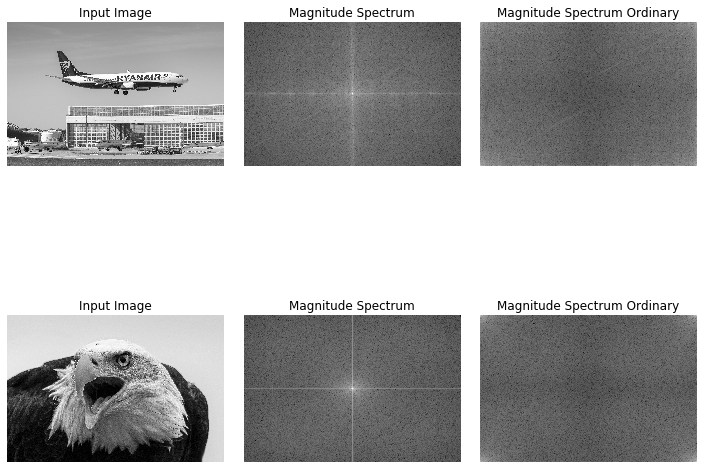

In [28]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
# x, y축으로 이산 푸리에 변환 (DFT)
f = np.fft.fft2(img)
# 주파수가 0인 컴포넌트를 중앙으로 가져와 분석을 더 쉽게 한다.
fshift = np.fft.fftshift(f)
# 스펙트럼을 구하는 수학식
magnitude_spectrum = 20 * np.log(np.abs(fshift))
magnitude_ordinary = 20 * np.log(np.abs(f))

img2 = cv2.imread("bald-eagle-5463386_1280.jpg", cv2.IMREAD_GRAYSCALE)
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20 * np.log(np.abs(fshift2))
magnitude_ordinary2 = 20 * np.log(np.abs(f2))

images = [img, magnitude_spectrum, magnitude_ordinary, img2, magnitude_spectrum2, magnitude_ordinary2]
titles = ["Input Image", "Magnitude Spectrum", "Magnitude Spectrum Ordinary"]
plt.figure(figsize=(10, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i % 3])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

    보면 중앙에 흰 영역으로 저주파가 표시된 것을 확인할 수 있다. (이미지에 fft2로 푸리에 변환을 하면 좌상단에 주파수가 0인 부분이 위치하게 된다. 분석을 용이하게 하기 위해 fftshift로 좌상단의 점을 이미지의 중심으로 이동시키고 log scaling을 통해 분석에 용이한 결과값으로 변환시켰다.)

    이렇게 우리는 주파수 변환을 찾았다. 우리는 이 결과를 통해 고주파 필터링, High Pass Filtering 등의 작업을 주파수 영역에서 수행하고 이미지를 재구성할 수 있다. (예. 역 DFT 찾기) HPF 작업을 위해서 먼저 fshift의 정중앙에 60*60 크기의 직사각형으로 마스킹해서 저주파를 제거해준다. 그런 다음 ifftshift 메소드를 사용해서 역으로 이동시켜주면서 주파수가 0인 요소를 다시 좌상단으로 돌려놓는다. 그 후 ifft2 메소드를 사용해 역 FFT를 찾는다. 그 결과로 우리는 복소수 결과를 얻을 수 있는데, 이미지의 픽셀값은 실수부이므로 real 함수를 통해 실수 영역만을 결과로 얻는다.

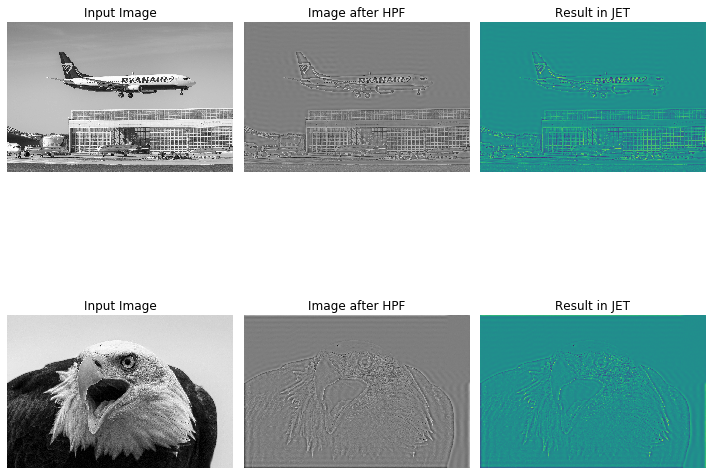

In [27]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("bald-eagle-5463386_1280.jpg", cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
f2 = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
fshift2 = np.fft.fftshift(f2)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# 저주파가 있는 정중앙에 60*60 크기의 윈도우를 만들어 해당 부분 0으로 초기화
fshift[crow-30 : crow+31, ccol-30 : ccol+31] = 0
# 정중앙으로 이동시킨 결과값을 원래 상태로 되돌림
f_ishift = np.fft.ifftshift(fshift)
# 역 푸리에 변환.
img_back = np.fft.ifft2(f_ishift)
# 이미지의 픽셀값은 실수값이므로 복소수 행렬의 실수부 확인
img_back = np.real(img_back)

rows2, cols2 = img2.shape
ccrow2, ccol2 = rows2//2, cols2//2
fshift2[ccrow2-30 : ccrow2+31, ccol2-30 : ccol2+31] = 0
f_ishift2 = np.fft.ifftshift(fshift2)
img_back2 = np.fft.ifft2(f_ishift2)
img_back2 = np.real(img_back2)

images = [img, img_back, img_back, img2, img_back2, img_back2]
titles = ["Input Image", "Image after HPF", "Result in JET"]
plt.figure(figsize=(10, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    if(i % 3 == 2):
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap = "gray")
    
    plt.title(titles[i % 3])
    plt.axis("off")

plt.tight_layout()
plt.show()

    그 결과 High Pass Filtering, 고주파 필터링을 통해 우리는 경계선 탐지 연산(Edge detection operation)을 수행할 수 있다. 또한 대부분의 이미지 데이터가 스펙트럼의 저주파 영역에 있음을 볼 수 있다. 이것이 우리가 [OpenCV Practice 12]의 Image Gradient에서 본 것이다. 어쨌든 Numpy 에서의 DFT, IDFT 등을 찾을 수 있었으며 동일하게 OpenCV 함수를 이용해 찾을 수도 있다.

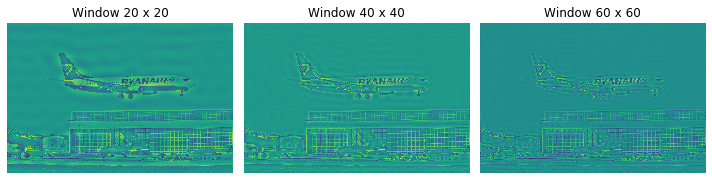

In [5]:
img = cv2.imread("ryanair-5249631_1920.jpg", cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-10 : crow+11, ccol-10 : ccol+11] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

fshift[crow-20 : crow+21, ccol-20 : ccol+21] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back2 = np.fft.ifft2(f_ishift)
img_back2 = np.real(img_back2)

fshift[crow-30 : crow+31, ccol-30 : ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back3 = np.fft.ifft2(f_ishift)
img_back3 = np.real(img_back3)

images = [img_back, img_back2, img_back3]
titles = ["Window 20 x 20", "Window 40 x 40", "Window 60 x 60"]
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i % 3])
    plt.axis("off")

plt.tight_layout()
plt.show()

    추가적으로 JET 색상의 이미지를 자세히 보면 살짝 잔물결이 일어나는 것을 확인할 수 있다. 이를 ringing effect, 링잉효과라고 한다. 이는 마스킹에 사용한 직사각형 모양의 윈도우 때문에 발생하는 문제이다. 이 직사각형 윈도우 마스크가 링잉효과를 일으키는 sinc shape로 변환되기 때문이다. (sinc shape, 싱크 함수의 푸리에 변환된 함수가 rectangular function, 구형함수이다.) 따라서 보통은 직사각형 윈도우는 필터링에 사용하지 않고, 가우시안 윈도우를 더 많이 사용한다. 